## Apple Health Processor - Weight

-----

## Dependencies and Libraries

In [65]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [66]:
# functions to convert UTC to Local time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/New_York'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Weight

In [67]:
weight = pd.read_csv("data/BodyMass.csv")

In [68]:
weight.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,EufyLife,7,NaN,BodyMass,lb,2021-06-02 07:27:38 -0400,2021-06-01 07:26:26 -0400,2021-06-01 07:26:26 -0400,306.660
1,EufyLife,7,NaN,BodyMass,lb,2021-06-04 07:27:50 -0400,2021-06-04 07:27:50 -0400,2021-06-04 07:27:50 -0400,303.794
2,EufyLife,7,NaN,BodyMass,lb,2021-06-04 07:27:51 -0400,2021-06-03 07:23:38 -0400,2021-06-03 07:23:38 -0400,304.676
3,EufyLife,7,NaN,BodyMass,lb,2021-06-05 09:02:04 -0400,2021-06-03 07:22:56 -0400,2021-06-03 07:22:56 -0400,304.676
4,EufyLife,7,NaN,BodyMass,lb,2021-06-05 09:02:10 -0400,2021-06-05 09:01:33 -0400,2021-06-05 09:01:33 -0400,303.794


In [69]:
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [70]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
99,EufyLife,3,NaN,BodyMass,lb,2021-08-19 07:30:40 -0400,2021-08-18 07:29:29-04:00,2021-08-18 07:29:29 -0400,277.339,2021,2021-08,2021-08-18
100,EufyLife,3,NaN,BodyMass,lb,2021-08-19 07:30:51 -0400,2021-08-19 07:30:51-04:00,2021-08-19 07:30:51 -0400,276.457,2021,2021-08,2021-08-19
101,EufyLife,3,NaN,BodyMass,lb,2021-08-20 07:34:10 -0400,2021-08-20 07:34:10-04:00,2021-08-20 07:34:10 -0400,276.677,2021,2021-08,2021-08-20
102,EufyLife,3,NaN,BodyMass,lb,2021-08-21 09:31:01 -0400,2021-08-21 09:31:01-04:00,2021-08-21 09:31:01 -0400,275.355,2021,2021-08,2021-08-21
103,EufyLife,3,NaN,BodyMass,lb,2021-08-22 10:29:39 -0400,2021-08-22 10:29:17-04:00,2021-08-22 10:29:17 -0400,276.016,2021,2021-08,2021-08-22


In [71]:
weight.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date'],
      dtype='object')

In [72]:
weight_by_date = weight.groupby(['date'])['value'].min().reset_index(name='Weight') # take min weight if multiple per day

In [73]:
weight_by_date.index

RangeIndex(start=0, stop=79, step=1)

In [74]:
weight_by_date.head(10)

,date,Weight
0,2021-06-01,306.660
1,2021-06-03,304.676
2,2021-06-04,303.794
3,2021-06-05,303.794
4,2021-06-06,302.251
5,2021-06-07,302.030
6,2021-06-08,302.030
7,2021-06-09,301.369
8,2021-06-10,301.369
9,2021-06-11,301.589


In [75]:
# weight_by_date.tail(10)
weight_by_date.to_csv("data/weight_per_day.csv", index=False)

<AxesSubplot:title={'center':'Daily weight'}, xlabel='date'>

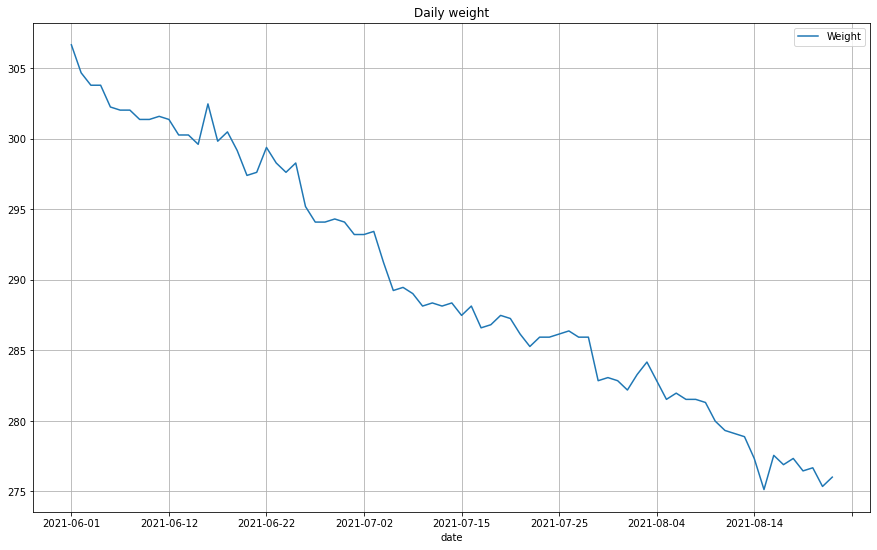

In [76]:
weight_by_date['RollingMeanWeight'] = weight_by_date.Weight.rolling(window=7, center=True).mean()
weight_by_date.plot(x='date', y='Weight', title= 'Daily weight', figsize=[15, 9], grid=True)

## Rolling Average

<AxesSubplot:title={'center':'Daily weight rolling mean over 7 days'}, xlabel='date'>

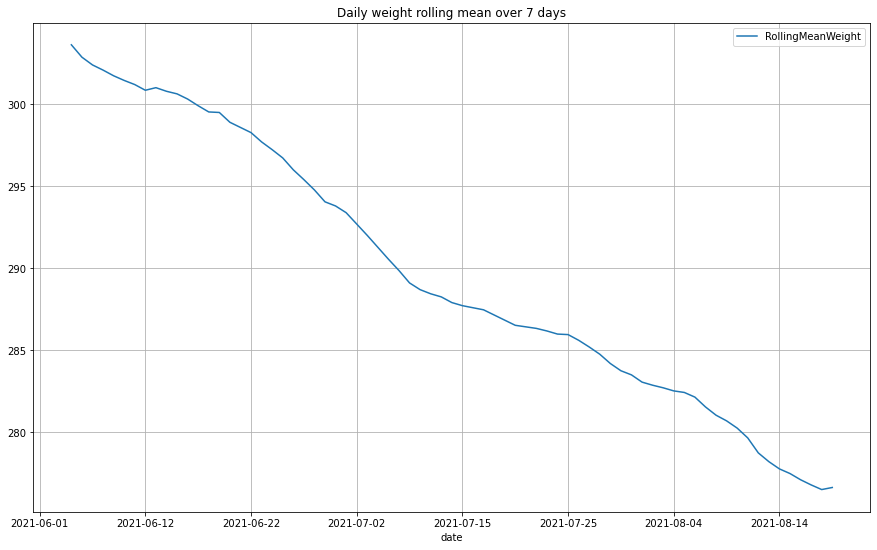

In [77]:
weight_by_date['RollingMeanWeight'] = weight_by_date.Weight.rolling(window=7, center=True).mean()
weight_by_date.plot(x='date', y='RollingMeanWeight', title= 'Daily weight rolling mean over 7 days', figsize=[15, 9], grid=True)
#print (plt.get_xlim())
#left_limit = float("2021-05-13".replace("-", ""))
#plt.set_xlim(1, 0)


------

In [78]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [79]:
# month_weight

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

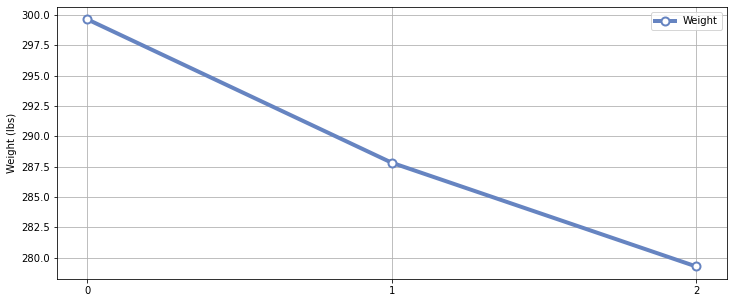

In [80]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xtickslabels(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()